First few rows of the dataset:
   ID        Age  Gender Tobacco_Use Alcohol_Use Family_History  Oral_Cancer
0   1  29.123660  Female      Former         Yes             No            0
1   2  80.436685    Male         Yes          No             No            1
2   3  21.448899  Female          No         Yes             No            1
3   4  68.114429  Female         Yes          No            Yes            0
4   5  67.507187  Female          No         Yes            Yes            0

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              100 non-null    int64  
 1   Age             100 non-null    float64
 2   Gender          100 non-null    object 
 3   Tobacco_Use     100 non-null    object 
 4   Alcohol_Use     100 non-null    object 
 5   Family_History  100 non-null    object 
 6   Oral_Cancer     1

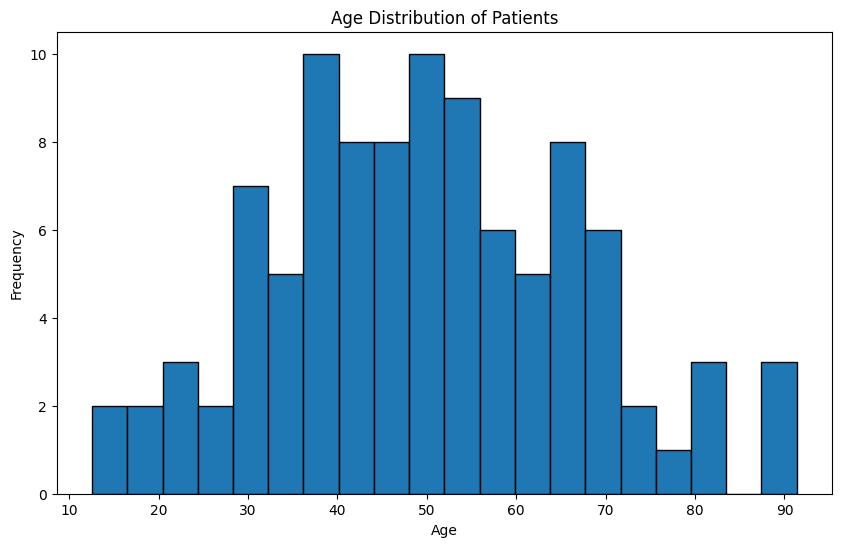

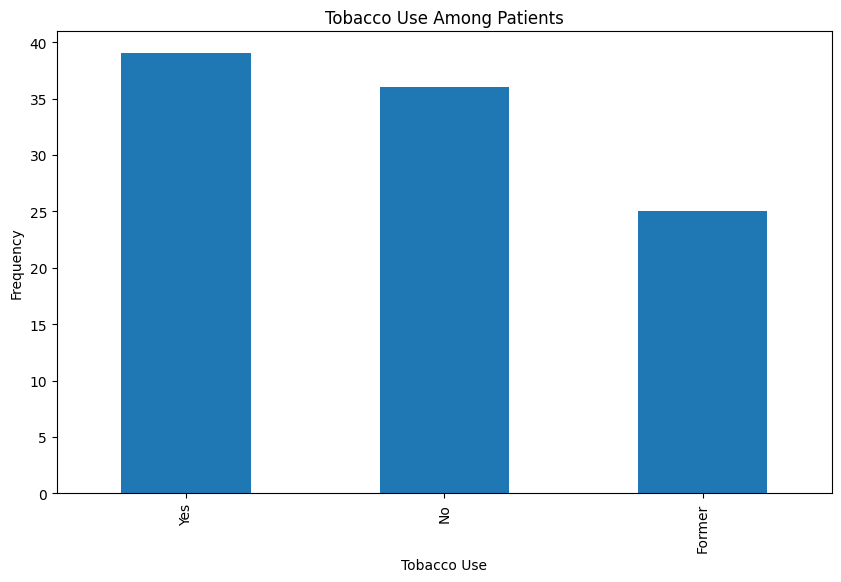


Model Accuracy: 80.00%


In [5]:
import pandas as pd
import numpy as np  # Add numpy import
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Create a sample dataset directly without using CSV file
data = {
    'ID': range(1, 101),
    'Age': np.random.normal(50, 15, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Tobacco_Use': np.random.choice(['Yes', 'No', 'Former'], 100),
    'Alcohol_Use': np.random.choice(['Yes', 'No', 'Former'], 100),
    'Family_History': np.random.choice(['Yes', 'No'], 100),
    'Oral_Cancer': np.random.choice([0, 1], 100, p=[0.7, 0.3])  # 30% positive cases
}

df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
df['Tobacco_Use'].value_counts().plot(kind='bar')
plt.title('Tobacco Use Among Patients')
plt.xlabel('Tobacco Use')
plt.ylabel('Frequency')
plt.show()

# Prepare data for modeling
target_column = 'Oral_Cancer'  # Using our known target column name
y = df[target_column]
X = df.drop([target_column, 'ID'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle categorical variables
encoder = LabelEncoder()
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = encoder.fit_transform(X_train[column])
    X_test[column] = encoder.transform(X_test[column])

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')